<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Projetos-data-science-/blob/main/BIG_DATA_TPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oficina Big Data

A instalação do PySpark no ambiente virtual do Google Colab é uma dúvida pertinente para aqueles que estão começando seus projetos de Data Science para ambientes na nuvem.

A definição de Big Data está cada vez mais presente em todos os seguimentos industriais, comerciais, e mesmo projetos pessoais podem assumir uma grande dimensionalidade devido à quantidade de dados disponíveis.

Para analisar grandes volumes de dados, Big Data, com velocidade, o Apache Spark é uma ferramenta muito utilizada, dada a sua capacidade de processamento de dados e computação paralela.

PySpark é a interface de alto nível que permite acessar e usar o Spark por meio da linguagem Python. Usando o PySpark, você consegue escrever todo o seu código usando apenas o estilo Python de escrever código.

Já o Google Colab é uma ferramenta maravilhosa, poderosa e gratuita – com suporte de GPU inclusive. Uma vez que roda 100% na nuvem, você não tem a necessidade de instalar qualquer coisa na sua própria máquina.

Entretanto, apesar da maioria das bibliotecas de Data Science estarem previamente instaladas no ambiente Colab, o mesmo não acontece com o PySpark. Para conseguir usar o PySpark é necessário alguns passos intermediários, que não são triviais para aqueles que estão começando.

Dessa maneira, a equipe preparou um material que permite a utilização das ferramentas com o colab.

#Instalando o PySpark no Google Colab

Instalar o PySpark não é um processo direto como de costume em Python, Não basta usar "um pip install" apenas. Na verdade, antes de tudo é necessário instalar dependências como o Java 8, Apache Spark 2.4.4 (ou a nova versão) junto com o Hadoop 2.7. (ou nova versão). Utilizando os comandos abaixo para realizar a instalação no colab.

In [ ]:
# instalar as dependências do pyspark no colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark


A próxima etapa é configurar as variáveis de ambiente, pois isso habilitará o ambiente do Colab a identificar corretamente onde as dependências do spark estão rodando.

In [ ]:
# configurar as variáveis de ambiente 
import os # Para conseguir “manipular” o terminal e interagir como ele, você pode usar a biblioteca 'os'.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
 

In [ ]:
# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')


Com tudo pronto, é necessário rodar uma sessão local para testar se a instalação funcionou corretamente, aproveitando e instalando as bibliotecas necessárias para a manipulação do arquivo, essas bibliotecas serão explicadas no decorrer da análise.

In [ ]:
# Importar as bibliotecas de trabalho do pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.functions import explode, explode_outer
from pyspark import SparkConf, SparkContext
sc = SparkSession.builder.master('local[*]').getOrCreate()

#Carregando os dados do arquivo que está em uma pasta no Google Drive

In [ ]:
df = sc.read.json('/content/drive/MyDrive/BIG_DATA_TPV/tpv_transformers_meters/tpv_transformers_meters.json')

Visualizando como os dados estão organizados para realizar a análise exploratória.

Como resultado, o schema abaixo, o que significa que os nossos dados estão rodando corretamente junto ao PySpark, porém os dados estão organizados de forma bastante complexa, é necessário a utilização de algum método para alinhar esses dados.

# O que são esses dados?
Esses dados são referentes a medição da qualidade de energia distribuida para a manufatura da empresa.

In [ ]:
# visualizar as colunas aninhadas
df.printSchema()
  

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- content: struct (nullable = true)
 |    |-- 0: struct (nullable = true)
 |    |    |-- afreq: double (nullable = true)
 |    |    |-- airms: double (nullable = true)
 |    |    |-- apf: double (nullable = true)
 |    |    |-- ava: double (nullable = true)
 |    |    |-- avah: double (nullable = true)
 |    |    |-- avar: double (nullable = true)
 |    |    |-- avarh: double (nullable = true)
 |    |    |-- avrms: double (nullable = true)
 |    |    |-- awatt: double (nullable = true)
 |    |    |-- awatth: double (nullable = true)
 |    |    |-- bfreq: double (nullable = true)
 |    |    |-- birms: double (nullable = true)
 |    |    |-- bpf: double (nullable = true)
 |    |    |-- bva: double (nullable = true)
 |    |    |-- bvah: double (nullable = true)
 |    |    |-- bvar: double (nullable = true)
 |    |    |-- bvarh: double (nullable = true)
 |    |    |-- bvrms: double (nullable = true)
 |    |

# Verificando se todas as dependencias do pyspark estão instaladas e operando, assim como nossa massa de dados.

In [ ]:
!ls

drive	     spark-2.4.4-bin-hadoop2.7	    spark-2.4.4-bin-hadoop2.7.tgz.1
sample_data  spark-2.4.4-bin-hadoop2.7.tgz  spark-warehouse


Agora que carregamos o conjunto de dados, podemos começar a analisar. Para o nosso modelo de regressão linear precisamos importar dois módulos de Pyspark, ou seja, Vector Assembler e Regression Linear. Vector Assembler é um transformador que reúne todas as características em um vetor de várias colunas que contêm tipo duplo. Poderíamos ter usado o StringIndexer se alguma de nossas colunas contiver valores de string para convertê-lo em valores numéricos. Nosso dataframe possui muitos valores nulos, então faremos um tratamento antes de aplicarmos a técnica de Regressão Linear.

Nivelando os dados, renomeando as colunas para uma melhor visualização e organizar para realizar a análise exploratória.

In [ ]:
# Nivelando as colunas
data = df.select(
    ### Content
    ### 0
    ### A
    col("_id.$oid").alias("id"), col("content.0.afreq").alias("afreq_transfor01"), col("content.0.airms").alias("airms_transfor01"), col("content.0.apf").alias("apf_transfor01"),
                 col("content.0.ava").alias("ava_transfor01"), col("content.0.avah").alias("avah_transfor01"), col("content.0.avar").alias("avar_transfor01"), col("content.0.avarh").alias("avarh_transfor01"),
                 col("content.0.avrms").alias("avrms_transfor01"), col("content.0.awatt").alias("awatt_transfor01"), col("content.0.awatth").alias("awatth_transfor01"),
                 ### B
                 col("content.0.bfreq").alias("bfreq_transfor01"), col("content.0.birms").alias("birms_transfor01"), col("content.0.bpf").alias("bpf_transfor01"),
                 col("content.0.bva").alias("bva_transfor01"), col("content.0.bvah").alias("bvah_transfor01"), col("content.0.bvar").alias("bvar_transfor01"), col("content.0.bvarh").alias("bvarh_transfor01"),
                 col("content.0.bvrms").alias("bvrms_transfor01"), col("content.0.bwatt").alias("bwatt_transfor01"), col("content.0.bwatth").alias("bwatth_transfor01"),
                 ### C
                 col("content.0.cfreq").alias("cfreq_transfor01"), col("content.0.cirms").alias("cirms_transfor01"), col("content.0.cpf").alias("cpf_transfor01"),
                 col("content.0.cva").alias("cva_transfor01"), col("content.0.cvah").alias("cvah_transfor01"), col("content.0.cvar").alias("cvar_transfor01"), col("content.0.cvarh").alias("cvarh_transfor01"),
                 col("content.0.cvrms").alias("cvrms_transfor01"), col("content.0.cwatt").alias("cwatt_transfor01"), col("content.0.cwatth").alias("cwatth_transfor01"),
                 ### events
                 col("content.0.events.a.event").alias("event_a_transfor01"), col("content.0.events.a.line_voltage").alias("line_voltage_a_transfor01"), col("content.0.events.a.percentage").alias("percentage_a_transfor01"),
                 col("content.0.events.b.event").alias("event_b_transfor01"), col("content.0.events.b.line_voltage").alias("line_voltage_b_transfor01"), col("content.0.events.b.percentage").alias("percentage_b_transfor01"),
                 col("content.0.events.c.event").alias("event_c_transfor01"), col("content.0.events.c.line_voltage").alias("line_voltage_c_transfor01"), col("content.0.events.c.percentage").alias("percentage_c_transfor01"),
                 ### 1
                 ### A
                 col("content.1.airms").alias("airms_transfor02"), col("content.1.apf").alias("apf_transfor02"),
                 col("content.1.ava").alias("ava_transfor02"), col("content.1.avah").alias("avah_transfor02"), col("content.1.avar").alias("avar_transfor02"), col("content.1.avarh").alias("avarh_transfor02"),
                 col("content.1.avrms").alias("avrms_transfor02"), col("content.1.awatt").alias("awatt_transfor02"), col("content.1.awatth").alias("awatth_transfor02"),
                 ### B
                 col("content.1.birms").alias("birms_transfor02"), col("content.1.bpf").alias("bpf_transfor02"),
                 col("content.1.bva").alias("bva_transfor02"), col("content.1.bvah").alias("bvah_transfor02"), col("content.1.bvar").alias("bvar_transfor02"), col("content.1.bvarh").alias("bvarh_transfor02"),
                 col("content.1.bvrms").alias("bvrms_transfor02"), col("content.1.bwatt").alias("bwatt_transfor02"), col("content.1.bwatth").alias("bwatth_transfor02"),
                 ### C
                 col("content.1.cirms").alias("cirms_transfor02"), col("content.1.cpf").alias("cpf_transfor02"),
                 col("content.1.cva").alias("cva_transfor02"), col("content.1.cvah").alias("cvah_transfor02"), col("content.1.cvar").alias("cvar_transfor02"), col("content.1.cvarh").alias("cvarh_transfor02"),
                 col("content.1.cvrms").alias("cvrms_transfor02"), col("content.1.cwatt").alias("cwatt_transfor02"), col("content.1.cwatth").alias("cwatth_transfor02"),
                 ### events
                 col("content.1.events.a.event").alias("event_a_transfor02"), col("content.1.events.a.line_voltage").alias("line_voltage_a_transfor02"), col("content.1.events.a.percentage").alias("percentage_a_transfor02"),
                 col("content.1.events.b.event").alias("event_b_transfor02"), col("content.1.events.b.line_voltage").alias("line_voltage_b_transfor02"), col("content.1.events.b.percentage").alias("percentage_b_transfor02"),
                 col("content.1.events.c.event").alias("event_c_transfor02"), col("content.1.events.c.line_voltage").alias("line_voltage_c_transfor02"), col("content.1.events.c.percentage").alias("percentage_c_transfor02"),
                 ### voltage_line
                 col("content.1.voltageline").alias("voltageline_transfor02"),

                 ### 2
                 ### A
                 col("content.2.afreq").alias("afreq_transfor03"), col("content.2.airms").alias("airms_transfor03"), col("content.2.apf").alias("apf_transfor03"),
                 col("content.2.ava").alias("ava_transfor03"), col("content.2.avah").alias("avah_transfor03"), col("content.2.avar").alias("avar_transfor03"), col("content.2.avarh").alias("avarh_transfor03"),
                 col("content.2.avrms").alias("avrms_transfor03"), col("content.2.awatt").alias("awatt_transfor03"), col("content.2.awatth").alias("awatth_transfor03"),
                 ### B
                 col("content.2.bfreq").alias("bfreq_transfor03"), col("content.2.birms").alias("birms_transfor03"), col("content.2.bpf").alias("bpf_transfor03"),
                 col("content.2.bva").alias("bva_transfor03"), col("content.2.bvah").alias("bvah_transfor03"), col("content.2.bvar").alias("bvar_transfor03"), col("content.2.bvarh").alias("bvarh.transfor03"),
                 col("content.2.bvrms").alias("bvrms_transfor03"), col("content.2.bwatt").alias("bwatt_transfor03"), col("content.2.bwatth").alias("bwatth_transfor03"),
                 ### C
                 col("content.2.cfreq").alias("cfreq_transfor03"), col("content.2.cirms").alias("cirms_transfor03"), col("content.2.cpf").alias("cpf_transfor03"),
                 col("content.2.cva").alias("cva_transfor03"), col("content.2.cvah").alias("cvah_transfor03"), col("content.2.cvar").alias("cvar_transfor03"), col("content.2.cvarh").alias("cvarh_transfor03"),
                 col("content.2.cvrms").alias("cvrms_transfor03"), col("content.2.cwatt").alias("cwatt_transfor03"), col("content.2.cwatth").alias("cwatth_transfor03"),
                 ### 3
                 ### A
                 col("content.3.airms").alias("airms_transfor04"), col("content.3.apf").alias("apf_transfor04"),
                 col("content.3.ava").alias("ava_transfor04"), col("content.3.avah").alias("avah_transfor04"), col("content.3.avar").alias("avar_transfor04"), col("content.3.avarh").alias("avarh_transfor04"),
                 col("content.3.avrms").alias("avrms_transfor04"), col("content.3.awatt").alias("awatt_transfor04"), col("content.3.awatth").alias("awatth_transfor04"),
                 ### 3
                 ### B
                 col("content.3.birms").alias("birms_transfor04"), col("content.3.bpf").alias("bpf_transfor04"),
                 col("content.3.bva").alias("bva_transfor04"), col("content.3.bvah").alias("bvah_transfor04"), col("content.3.bvar").alias("bvar_transfor04"), col("content.3.bvarh").alias("bvarh_transfor04"),
                 col("content.3.bvrms").alias("bvrms_transfor04"), col("content.3.bwatt").alias("bwatt_transfor04"), col("content.3.bwatth").alias("bwatth_transfor04"),
                 ### 3
                 ### C
                 col("content.3.cirms").alias("cirms_transfor04"), col("content.3.cpf").alias("cpf_transfor04"),
                 col("content.3.cva").alias("cva_transfor04"), col("content.3.cvah").alias("cvah_transfor04"), col("content.3.cvar").alias("cvar_transfor04"), col("content.3.cvarh").alias("cvarh_transfor04"),
                 col("content.3.cvrms").alias("cvrms_transfor04"), col("content.3.cwatt").alias("cwatt_transfor04"), col("content.3.cwatth").alias("cwatth_transfor04"),
                 ### date_time
                 col("content.datetime").alias("date_time"),
                 ### demand
                 col("content.demand.notification").alias("demand_notification"), col("content.demand.percentageDemand").alias("percentage_Demand"),
                 ### meters_substation
                 col("content.meters.Substation.idx").alias("meters_subs_idx"), col("content.meters.Substation.isOnline").alias("meters_subs_isOnline"),
                 
                 ### meters_substation
                 col("content.meters.Transformer001.idx").alias("meters_Transformer01_idx"), col("content.meters.Transformer001.isOnline").alias("meters_Transformer01_isOnline"),
                 col("content.meters.Transformer002.idx").alias("meters_Transformer02_idx"), col("content.meters.Transformer002.isOnline").alias("meters_Transformer02_isOnline"),
                 col("content.meters.Transformer003.idx").alias("meters_Transformer03_idx"), col("content.meters.Transformer003.isOnline").alias("meters_Transformer03_isOnline"),
                 col("content.meters.Transformer004.idx").alias("meters_Transformer04_idx"), col("content.meters.Transformer004.isOnline").alias("meters_Transformer04_isOnline"),
                ### offline
                col("content.offline").alias("offline"), 
                 ### sum
                 col("content.sum.acc_watth").alias("sum_acc_watth"), col("content.sum.demmand").alias("sum_demmand"), col("content.sum.pf").alias("sum_pf"), col("content.sum.va").alias("sum_va"),
                 col("content.sum.vah").alias("sum_vah"), col("content.sum.var").alias("sum_var"), col("content.sum.varh").alias("sum_varh"), col("content.sum.watt").alias("sum_watth"),
                 ### time_average
                 col("content.time_average").alias("time_average"),
                 ### time_stamp
                 col("time_stamp.$date").alias("date")
                 
                 )
                 

data.show()

+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------------+-----------------------+------------------+-------------------------+-----------------------+------------------+-------------------------+-----------------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----------------+--------------+--------------+---------

A empresa possui 4 transformadores mas apenas dois funcionam por vez, isso explica a grande quantidade de valores nulos, mas para iniciarmos vamos realizar a análise de apenas 1 transformador. Com isso, retiramos do dataframe todas as colunas que não utilizaremos.

In [ ]:
dataframe=data.drop('id',  'bfreq_transfor01', 'birms_transfor01', 'bpf_transfor01', 'bva_transfor01', 'bvah_transfor01', 'bvar_transfor01', 'bvarh_transfor01', 
                    'bvrms_transfor01', 'bwatt_transfor01', 'bwatth_transfor01', 'cfreq_transfor01', 'cirms_transfor01', 'cpf_transfor01', 'cva_transfor01'
                    'cvah_transfor01', 'cvar_transfor01', 'cvarh_transfor01', 'cvrms_transfor01', 'cwatt_transfor01' 'cwatth_transfor01', 'event_a_transfor01', 
                    'line_voltage_a_transfor01', 'percentage_a_transfor01', 'event_b_transfor01', 'line_voltage_b_transfor01', 'percentage_b_transfor01', 
                    'event_c_transfor01', 'line_voltage_c_transfor01', 'percentage_c_transfor01', 'airms_transfor02', 'apf_transfor02', 'ava_transfor02', 
                    'avah_transfor02', 'avar_transfor02', 'avarh_transfor02', 'avrms_transfor02', 'awatt_transfor02', 'awatth_transfor02', 'birms_transfor02', 
                    'bpf_transfor02', 'bva_transfor02', 'bvah_transfor02', 'bvar_transfor02', 'bvarh_transfor02', 'bvrms_transfor02', 'bwatt_transfor02', 
                    'bwatth_transfor02', 'cirms_transfor02', 'cpf_transfor02', 'cva_transfor02', 'cvah_transfor02', 'cvar_transfor02', 'cvarh_transfor02', 
                    'cvrms_transfor02', 'cwatt_transfor02', 'cwatth_transfor02', 'event_a_transfor02', 'line_voltage_a_transfor02', 'percentage_a_transfor02', 
                    'event_b_transfor02', 'line_voltage_b_transfor02', 'percentage_b_transfor02', 'event_c_transfor02', 'line_voltage_c_transfor02', 'percentage_c_transfor02', 
                    'voltageline_transfor02', 'afreq_transfor03', 'airms_transfor03', 'apf_transfor03', 'ava_transfor03', 'avah_transfor03', 'avar_transfor03', 'avarh_transfor03', 
                    'avrms_transfor03', 'awatt_transfor03', 'awatth_transfor03', 'bfreq_transfor03', 'birms_transfor03', 'bpf_transfor03', 'bva_transfor03', 'bvah_transfor03', 
                    'bvar_transfor03', 'bvarh.transfor03', 'bvrms_transfor03', 'bwatt_transfor03', 'bwatth_transfor03', 'cfreq_transfor03', 'cirms_transfor03', 'cpf_transfor03', 
                    'cva_transfor03', 'cvah_transfor03', 'cvar_transfor03', 'cvarh_transfor03', 'cvrms_transfor03', 'cwatt_transfor03', 'cwatth_transfor03', 'airms_transfor04', 
                    'apf_transfor04', 'ava_transfor04', 'avah_transfor04', 'avar_transfor04', 'avarh_transfor04', 'avrms_transfor04', 'awatt_transfor04', 'awatth_transfor04', 
                    'birms_transfor04', 'bpf_transfor04', 'bva_transfor04', 'bvah_transfor04', 'bvar_transfor04', 'bvarh_transfor04', 'bvrms_transfor04', 'bwatt_transfor04', 
                    'bwatth_transfor04', 'cirms_transfor04', 'cpf_transfor04', 'cva_transfor04', 'cvah_transfor04', 'cvar_transfor04', 'cvarh_transfor04', 'cvrms_transfor04', 
                    'cwatt_transfor04', 'cwatth_transfor04', 'date_time', 'demand_notification', 'percentage_Demand', 'meters_subs_idx', 'meters_subs_isOnline', 'meters_Transformer01_idx', 
                    'meters_Transformer01_isOnline', 'meters_Transformer02_idx', 'meters_Transformer02_isOnline', 'meters_Transformer03_idx', 'meters_Transformer03_isOnline', 'meters_Transformer04_idx', 
                    'meters_Transformer04_isOnline', 'offline', 'sum_acc_watth', 'sum_demmand', 'sum_pf', 'sum_va', 'sum_vah', 'sum_var', 'sum_varh', 'sum_watth', 'time_average', 
                    'cva_transfor01', 'cvah_transfor01', 'cwatt_transfor01', 'cwatth_transfor01')
dataframe.show()

+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  afreq_transfor01| airms_transfor01|    apf_transfor01|    ava_transfor01|   avah_transfor01|   avar_transfor01|  avarh_transfor01|  avrms_transfor01|  awatt_transfor01| awatth_transfor01|                date|
+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+
| 59.98194894427409|716.6789508090116|0.9681929124012061|170676.49247856849| 94.09621787080019| 41954.63569121699| 23.26953683408982|236.12278427201713|165313.91172715888|136.60337495711596|2021-04-28T15:59:...|
| 59.97411319386335|713.1209895804516|0.9683041719220888|169883.56952181362| 94.85116386525107| 42899.16732651766|23.339109585049098|236.10104509703334|

## Removendo valores nulos

In [ ]:
# Conferindo a quantidade de valores nulos

from pyspark.sql.functions import isnull, when, count, col
dataframe.select([count(when(isnull(c), c)).alias(c) for c in dataframe.columns]).show()

+----------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----+
|afreq_transfor01|airms_transfor01|apf_transfor01|ava_transfor01|avah_transfor01|avar_transfor01|avarh_transfor01|avrms_transfor01|awatt_transfor01|awatth_transfor01|date|
+----------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----+
|          287946|          287946|        287946|        287946|         287946|         287946|          287946|          287946|          287946|           287946|   0|
+----------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----+



In [ ]:
# Removendo valores nulos
dataframe = dataframe.dropna()

In [ ]:
# Conferindo novamente a quantidade de valores nulos

from pyspark.sql.functions import isnull, when, count, col
dataframe.select([count(when(isnull(c), c)).alias(c) for c in dataframe.columns]).show()

+----------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----+
|afreq_transfor01|airms_transfor01|apf_transfor01|ava_transfor01|avah_transfor01|avar_transfor01|avarh_transfor01|avrms_transfor01|awatt_transfor01|awatth_transfor01|date|
+----------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----+
|               0|               0|             0|             0|              0|              0|               0|               0|               0|                0|   0|
+----------------+----------------+--------------+--------------+---------------+---------------+----------------+----------------+----------------+-----------------+----+



In [ ]:
!pip install --upgrade plotly
!pip install jupyter-dash

     |████████████████████████████████| 25.3 MB 61.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 7.3 MB 4.2 MB/s 
     |████████████████████████████████| 357 kB 60.0 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=9e5f9e31acfae0acfd080774deebb0850293cd131375bf3f2b1e380978114eec
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=4e97262edbff60399e506f8ff5058bb353eb6605367c71af45892761e3a79b45
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=384f5a3301e557

In [ ]:
!pip install databricks_dash

In [ ]:
data_=dataframe.select('awatth_transfor01', 'date')
data_.show(10)

+------------------+--------------------+
| awatth_transfor01|                date|
+------------------+--------------------+
|136.60337495711596|2021-04-28T15:59:...|
| 91.87669371866443|2021-04-28T15:59:...|
|  91.4102074338274|2021-04-28T15:59:...|
| 45.54604140684358|2021-04-28T15:59:...|
|  91.0498245424786|2021-04-28T15:59:...|
| 90.88747162932256|2021-04-28T15:59:...|
| 46.05980846233606|2021-04-28T15:59:...|
|138.34278032591595|2021-04-28T15:59:...|
| 91.69524046278414|2021-04-28T15:59:...|
| 45.69055578748125|2021-04-28T15:59:...|
+------------------+--------------------+
only showing top 10 rows



# Realizando a descrição técnica de cada coluna (variável)
### O transformador possui 3 fases (a, b e c), para delimitar ainda mais a equipe está analizando apenas a fase (a) do transformador.
# descrição das variáveis:
### freq: Frequência da fase
### irms: Corrente eficaz
### pf: Fator de potência
### va: Potência aparente
### vah: Potência aparente por unidade de tempo
### var: Potência reativa
### varh Potência ativa por unidade de tempo
### vrms - Tensão da corrente alternada
### watt - potência ativa
### watth - Potência por unidade de tempo.


In [ ]:
dataframe.describe().toPandas().transpose()

# Plotando os gráficos

# O modelo de machine Learning:
## Regressão linear

O campo de Machine Learning oferece tantas opções de algoritmos que é muito difícil alguém conhecer todos e se manter atualizado a cada dia.

A escolha do algoritmo correto tem um enorme impacto na qualidade da solução, por isso é importante não apenas usar uma biblioteca pronta (sem ter a mínima ideia do que está por trás), mas ter pelo menos uma noção da teoria por trás dos modelos e algoritmos que você implementa.

Uma das primeiras técnicas que a(o) cientista de dados costuma ter contato no começo dos seus estudos é a Análise de Regressão, como abordado neste projeto.

### Vector Assember

VectorAssember da biblioteca Spark ML é um módulo que permite converter recursos numéricos em um único vetor que é usado pelos modelos de aprendizado de máquina. Como uma visão geral, o que é fazer é uma lista de colunas (características) e combiná-la em uma única coluna vetorial (vetor de características).

In [ ]:
# Vector Assember
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression, RandomForestRegressor

In [ ]:
# Transformando em um único vetor
assembler = VectorAssembler(inputCols=['apf_transfor01', 'ava_transfor01', 'avah_transfor01', 'avarh_transfor01', 'awatt_transfor01'], outputCol = 'Attributes')


In [ ]:
output = assembler.transform(dataframe)


In [ ]:
# Visualizando os atributos destacados com a varável que queremos realizar a predição (watt/h do transformador 1)
finalized_data = output.select("Attributes","awatth_transfor01")

finalized_data.show()

Aqui, 'Attributes' estão nos recursos de entrada de todas as colunas e 'awatth_transfor01' é a coluna-alvo. Em seguida, devemos dividir os dados de treinamento e teste de acordo com nosso conjunto de dados (0,7 para treino e 0,3 para teste).

In [ ]:
# Dividindo as variáveis em treino e teste
train_data,test_data = finalized_data.randomSplit([0.7,0.3])

In [ ]:
regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'awatth_transfor01')

In [ ]:
# Treinando o modelo, pois temos a maior proporção de dados
regressor = regressor.fit(train_data)

In [ ]:
# Realizando o teste de predição
pred = regressor.transform(test_data)

In [ ]:
# Mostrando os valores da predição
pred.show()

Também podemos imprimir o coeficiente e interceptação do modelo de regressão usando o seguinte comando:

In [ ]:
# Coeficiente do modelo de regressão
coeff = regressor.coefficients


In [ ]:
# Interciptação do eixo x e y
intr = regressor.intercept

In [ ]:
# Imprimindo o coeficiente de regressão linear e a interceptação de x e y
print ("O coeficiente de Regressão Linear do modelo é : %a" %coeff)
print ("A interceptação de X e Y é : %f" %intr)

# Análise estatística do modelo 
Uma vez terminado com a operação de regressão linear básica, podemos ir um pouco mais longe e analisar nosso modelo estatisticamente importando o módulo RegressionEvaluator de Pyspark.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="awatth_transfor01", predictionCol="prediction", metricName="rmse")

In [ ]:
# Erro da média quadrática (a depender do problema, podemos ter valores negativos) - rmse
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

In [ ]:
# Erro absoluto médio - mae
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

In [ ]:
# Coeficiente de determinação - r2
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)


In [ ]:
print(f'O valor do rmse da técnica de regressão linear é: {rmse}')

# Plotando os gráficos


# O que é Análise de Regressão?
O objetivo da análise de regressão é explorar o relacionamento existente entre duas ou mais variáveis, visando obter informações sobre uma delas a partir dos valores conhecidas das outras.

 análise de regressão busca entender o relacionamento entre variáveis, e esse relacionamento pode ser representado por uma equação matemática.




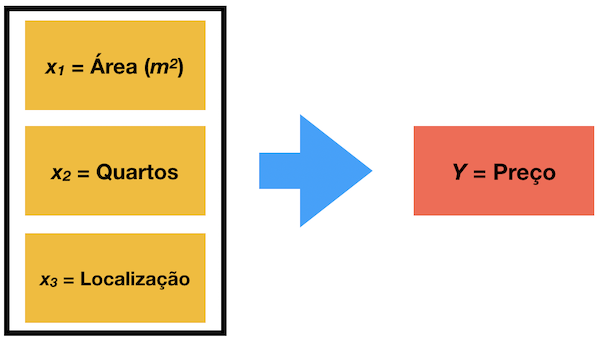

Supondo que você queira saber o preço de venda de uma casa sua e acredita que existe um relacionamento entre as variáveis que você está considerando (área construída, número de quartos e localização) com o preço que você pode pedir nela.

 Seria possível fazer uma análise de regressão, baseado nas outras casas da cidade para estimar o preço de venda da sua, após obter os pesos para os parâmetros em um modelo de Machine Learning.

# Relação não determinística

Um ponto importante mas muito desconhecido é que nos nossos problemas do cotidiano, muitas variáveis x e y aparentam estar relacionadas uma com a outra, porém de maneira não determinística.

Uma relação determínistica, por exemplo, é quando queremos saber a distância (x) percorrida por um carro, mantendo velocidade constante (V)  ao longo de intantes de tempo. Nesse exemplo, sabemos que a distância percorrida será, v = x/t, pois as variáveis estão relacionadas deterministicamente.